In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import style
style.use("ggplot")

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'CustomerID':'id','Gender':'gender','Age':'age','Annual Income (k$)':'income',
                   'Spending Score (1-100)':'score'},inplace=True)

In [5]:
df.head(1)

,id,gender,age,income,score
0,1,Male,19,15,39


In [6]:
df.loc[0:2,['gender','age']]

,gender,age
0,Male,19
1,Male,21
2,Female,20


In [7]:
df[['gender','age']].count()

gender    200
age       200
dtype: int64

In [8]:
df['age'].mean() #Mean Age

38.85

In [9]:
df['age'].median() #Median Age

36.0

In [10]:
df['age'].mode()

0    32
dtype: int64

In [11]:
df['age'].min() #Minimum Age

18

In [12]:
df['age'].max() #Maximum Age

70

In [13]:
df.sort_values('age',ascending=True).iloc[0:2]

,id,gender,age,income,score
114,115,Female,18,65,48
91,92,Male,18,59,41


In [14]:
df.groupby('gender').count()['id']/200*100 #% of Female and Male customers

gender
Female    56.0
Male      44.0
Name: id, dtype: float64

In [15]:
df.set_index('id',inplace=True)

Text(0, 0.5, 'Count')

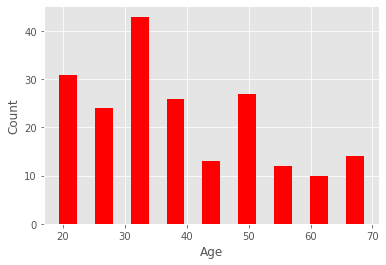

In [17]:
plt.hist(df['age'],color='red', bins='auto', rwidth=0.5,label=True, histtype='bar')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

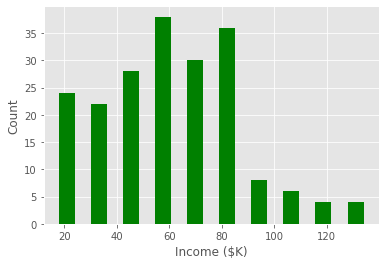

In [20]:
plt.hist(df['income'],color='green', bins='auto', rwidth=0.5,label=True, histtype='bar')
plt.xlabel('Income ($K)')
plt.ylabel('Count')

In [89]:
df['income'].corr(df['score']) #Correlation between income and the score is pretty low

0.009902848094037608

Text(0, 0.5, 'Purchasing Score')

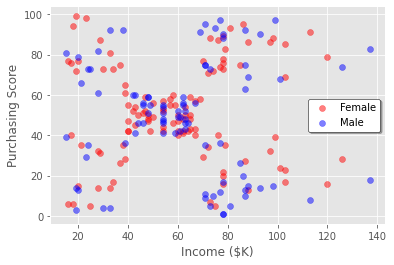

In [25]:
plt.scatter(df[df['gender']=='Female']['income'],df[df['gender']=='Female']['score'],c='red',alpha=0.5,label='Female')
plt.scatter(df[df['gender']=='Male']['income'],df[df['gender']=='Male']['score'],c='blue',alpha=0.5,label='Male')
plt.legend(shadow=True,facecolor='white',edgecolor='black')
plt.xlabel('Income ($K)')
plt.ylabel('Purchasing Score')

Text(0, 0.5, 'Purchasing Score')

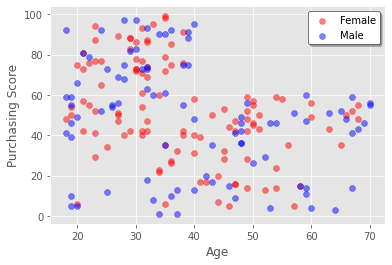

In [26]:
plt.scatter(df[df['gender']=='Female']['age'],df[df['gender']=='Female']['score'],c='red',alpha=0.5,label='Female')
plt.scatter(df[df['gender']=='Male']['age'],df[df['gender']=='Male']['score'],c='blue',alpha=0.5,label='Male')
plt.legend(shadow=True,facecolor='white',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Purchasing Score')

In [27]:
df.head(2)

,gender,age,income,score
id,,,,
1,Male,19,15,39
2,Male,21,15,81


In [28]:
X=df[['income','score']]

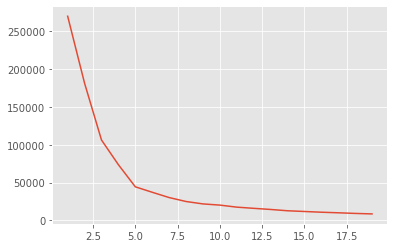

In [29]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)

In [30]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=1)
y=kmeans.fit_predict(X)

In [31]:
df['income_clusters']=y

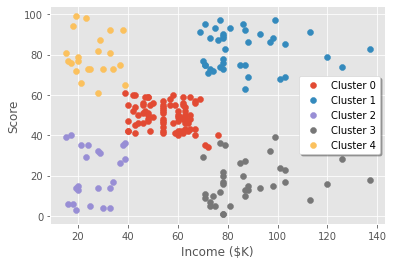

In [32]:
for i in range(0,5):
    label='Cluster '+str(i)
    plt.scatter(df[df['income_clusters']==i]['income'],df[df['income_clusters']==i]['score'],label=label)
plt.xlabel('Income ($K)')
plt.ylabel('Score')
plt.legend(facecolor='white',shadow=True)

In [33]:
X1=df[['age','score']]

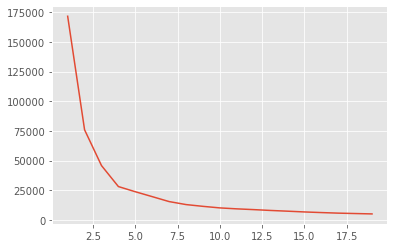

In [34]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)

In [35]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=1)
y=kmeans.fit_predict(X1)

In [36]:
df['age_clusters']=y

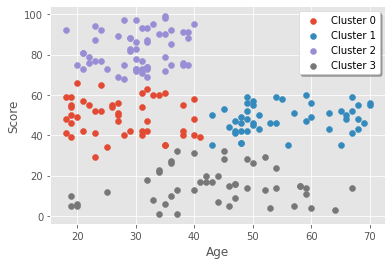

In [37]:
for i in range(0,4):
    label='Cluster '+str(i)
    plt.scatter(df[df['age_clusters']==i]['age'],df[df['age_clusters']==i]['score'],label=label)
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend(facecolor='white',shadow=True)

In [38]:
X2=df[['age','income','score']]

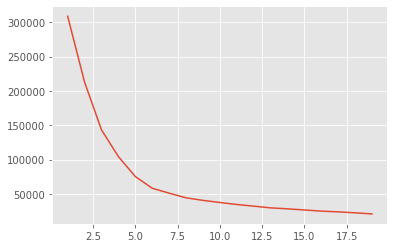

In [39]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)

In [40]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=1)
y=kmeans.fit_predict(X2)

In [41]:
df['combined_clusters']=y

Text(0, 0.5, 'Income')

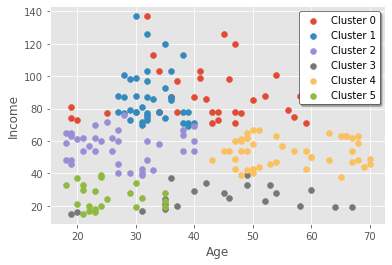

In [42]:
for i in range(0,6):
    label='Cluster '+str(i)
    plt.scatter(df[df['combined_clusters']==i]['age'],df[df['combined_clusters']==i]['income'],label=label)
plt.legend(facecolor='white',edgecolor='black',shadow=True)
plt.xlabel('Age')
plt.ylabel('Income')

In [43]:
df.groupby('combined_clusters').max()

,gender,age,income,score,income_clusters,age_clusters
combined_clusters,,,,,,
0,Male,59,137,39,3,3
1,Male,40,137,97,1,2
2,Male,40,76,61,3,0
3,Male,67,39,40,2,3
4,Male,70,67,60,2,1
5,Male,35,39,99,4,2


In [44]:
print('From the above Table it is clear that Cluster 1 and Cluster 5 are the most valuable. The Age vs Income distribution of the same is given in the above scatter plot')

From the above Table it is clear that Cluster 1 and Cluster 5 are the most valuable. The Age vs Income distribution of the same is given in the above scatter plot


Text(0, 0.5, 'Income')

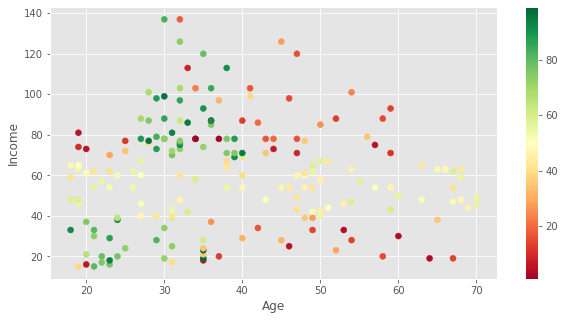

In [45]:
#Using Figure Object:
fig, ax =plt.subplots(figsize=(10,5))
sctr=ax.scatter(df['age'],df['income'],c=df['score'],cmap='RdYlGn')
plt.colorbar(sctr,ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Income')

The Scale on the right represents the Spending Score


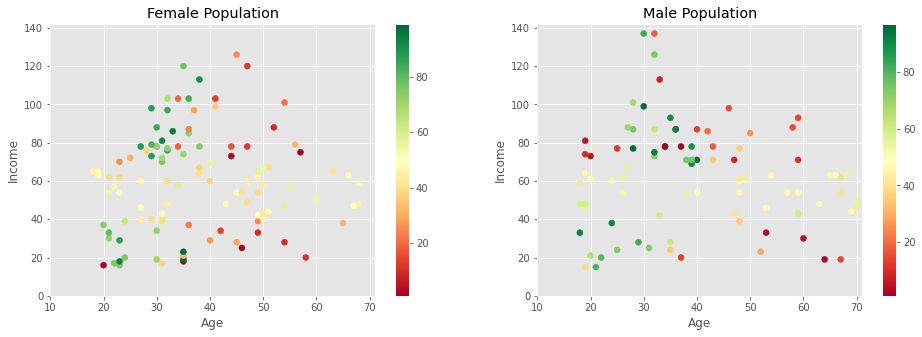

In [46]:
#For Female:
fig, [ax1,ax2] =plt.subplots(1,2,figsize=(16,5))
sctr1=ax1.scatter(df[df['gender']=='Female']['age'],df[df['gender']=='Female']['income'],
                c=df[df['gender']=='Female']['score'],cmap='RdYlGn')
plt.colorbar(sctr,ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_title('Female Population')
ax1.set(xlim=(10,df['age'].max()+1),ylim=(0,df['income'].max()+5))

sctr2=ax2.scatter(df[df['gender']=='Male']['age'],df[df['gender']=='Male']['income'],
                c=df[df['gender']=='Male']['score'],cmap='RdYlGn')
plt.colorbar(sctr2,ax=ax2)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_title('Male Population')
ax2.set(xlim=(10,df['age'].max()+1),ylim=(0,df['income'].max()+5))

print('The Scale on the right represents the Spending Score')